In [7]:
from bs4 import BeautifulSoup

html = """
        <!DOCTYPE html>
        <html lang="ko">

        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Document</title>
        </head>

        <body>
            <div id="main">
                <h1 class="title">파이썬 스크래핑</h1>
                <h1 class="test">테스트</h1>
                <p class="desc">데이터 추출 예제</p>
                <a href="https://example.com" class="link">더 알아보기</a>
                <ul class="items">
                    <li data-id="101">첫번째</li>
                    <li data-id="102">두번째</li>
                    <li data-id="103">세번째</li>
                </ul>
            </div>
        </body>

        </html>
"""
soup = BeautifulSoup(html,"html.parser")
print(type(html))
print(type(soup))

<class 'str'>
<class 'bs4.BeautifulSoup'>


In [8]:
# 1. find("tag") - html 첫번째
h1_tag = soup.find("h1").text
print(h1_tag)

파이썬 스크래핑


In [12]:
# 2. find("tag", class_="")
h1_class = soup.find("h1", class_="test")
h1_class.text

'테스트'

In [18]:
# 3. find_all("tag")
h1_all = soup.find_all("h1")
# [<h1 class="title">파이썬 스크래핑</h1>, <h1 class="test">테스트</h1>]
print(h1_all[0].text)

파이썬 스크래핑


In [23]:
# 4. select("css")
css_li = soup.select(".items li")
# [<li data-id="101">첫번째</li>,
#  <li data-id="102">두번째</li>,
#  <li data-id="103">세번째</li>]
for item in css_li:
    print(f'- {item.text}')

- 첫번째
- 두번째
- 세번째


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://finance.yahoo.com/quote/005930.KS/history/'

headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36',
    'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
}

res = requests.get(url, headers=headers)

html = res.text

soup = BeautifulSoup(html,"html.parser")

first_tr = soup.find("tr")
first_class = first_tr.get('class')[0]
# print(first_class)

# print(soup.find_all("td",class_=first_class)[0].text)
# print(soup.find_all("td",class_=first_class)[1].text)
# print(soup.find_all("td",class_=first_class)[2].text)
# print(soup.find_all("td",class_=first_class)[3].text)
# print(soup.find_all("td",class_=first_class)[4].text)
# print(soup.find_all("td",class_=first_class)[5].text)
# print(soup.find_all("td",class_=first_class)[6].text)
# print(soup.find_all("td",class_=first_class)[7].text)

# first_data = pd.to_datetime().strftime('%Y년 %m월 %d일')
first_data = pd.to_datetime(soup.find_all("td",class_=first_class)[0].text).strftime('%Y년 %m월 %d일')
print(first_data)

first_price = soup.find_all("td",class_=first_class)[1].text.replace('.00','원')
print(first_price)

2026년 01월 05일
134,600원


In [ ]:
# first_tr = soup.find("tr")
# first_class = first_tr.get('class')[0]

rows = soup.find_all("tr", class_=first_class)
print(len(rows))

dates=[]
prices=[]

for i in range(1,len(rows)):
    cells = rows[i].find_all('td')
    # print(cells)
    if len(cells) == 7:
        # date = pd.to_datetime(cells[0].text).strftime('%Y-%m-%d')
        date = pd.to_datetime(cells[0].text)
        close_price = cells[4].text.replace('.00','원')
        # print(f'날짜 : {date} / 종가 : {close_price}')
        dates.append(date)
        prices.append(int(cells[4].text.replace(',','').replace('.00','')))

print(f'{dates[0]} 증가는 {prices[0]}')

dates = dates[::-1]
prices= prices[::-1]

245
2026-01-05 증가는 136200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    241 non-null    object
 1   price   241 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


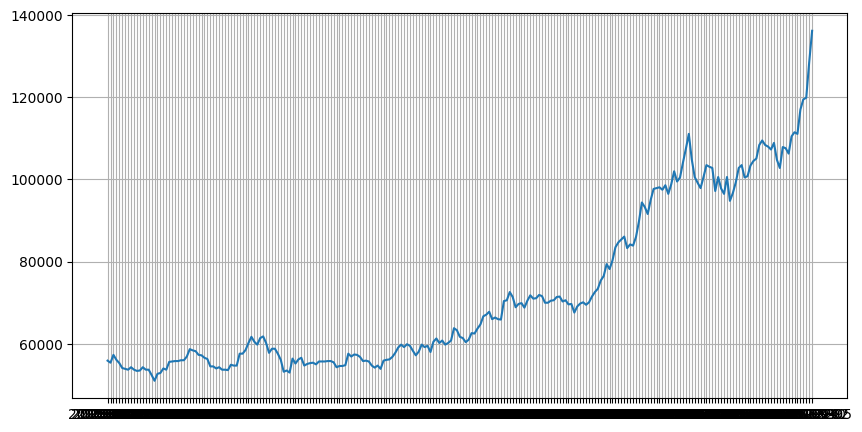

In [94]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

stock_data = pd.DataFrame({'date':dates,'price':prices})
stock_data.info()
stock_data

min_price = stock_data['price'].min()
max_price = stock_data['price'].max()
y_ticks =range(min_price,max_price,30000)

plt.figure(figsize=(10,5))
plt.plot(stock_data['date'],stock_data['price'])
plt.grid(True)
# plt.yticks(y_ticks)
plt.show()

In [72]:
import pandas as pd
import requests
from io import StringIO

stock_data = pd.DataFrame()

url = 'https://finance.yahoo.com/quote/005930.KS/history/'

headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36',
    'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7'
}
res = requests.get(url, headers=headers)

stock_data = pd.read_html(StringIO(str(res.text)),header=0)[0]

stock_data.columns = ['날짜', '시가', '고가', '저가', '종가', '조정증가', '거래량']
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      244 non-null    object
 1   시가      244 non-null    object
 2   고가      244 non-null    object
 3   저가      244 non-null    object
 4   종가      244 non-null    object
 5   조정증가    244 non-null    object
 6   거래량     244 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


In [76]:
stock_data.info()
stock_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      244 non-null    object
 1   시가      244 non-null    object
 2   고가      244 non-null    object
 3   저가      244 non-null    object
 4   종가      244 non-null    object
 5   조정증가    244 non-null    object
 6   거래량     244 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


,날짜,시가,고가,저가,종가,조정증가,거래량
0,"Jan 5, 2026",134600.00,137800.00,133600.00,137800.00,137800.00,33657409
1,"Jan 2, 2026",120200.00,128500.00,120200.00,128500.00,128500.00,30463279
2,"Dec 30, 2025",119100.00,121200.00,118700.00,119900.00,119900.00,19746349
3,"Dec 29, 2025",119400.00,119700.00,118200.00,119500.00,119500.00,19676004
4,"Dec 26, 2025",112400.00,117000.00,112400.00,117000.00,117000.00,34018174
...,...,...,...,...,...,...,...
239,"Jan 10, 2025",56100.00,56500.00,55200.00,55300.00,54395.56,16059223
240,"Jan 9, 2025",57600.00,57700.00,56100.00,56100.00,55182.48,24490592
241,"Jan 8, 2025",54800.00,57500.00,54700.00,57300.00,56362.85,26593553
242,"Jan 7, 2025",56800.00,57300.00,55400.00,55400.00,54493.92,17030235


In [78]:
stock_data['날짜'] = pd.to_datetime(stock_data['날짜'])
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      244 non-null    datetime64[ns]
 1   시가      244 non-null    object        
 2   고가      244 non-null    object        
 3   저가      244 non-null    object        
 4   종가      244 non-null    object        
 5   조정증가    244 non-null    object        
 6   거래량     244 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.5+ KB


In [83]:
stock_data.isna().count()
# len(stock_data)

날짜      244
시가      244
고가      244
저가      244
종가      244
조정증가    244
거래량     244
dtype: int64

In [96]:
stock_data.to_csv("out1.dsv", index=False, encoding="utf-8-sig")

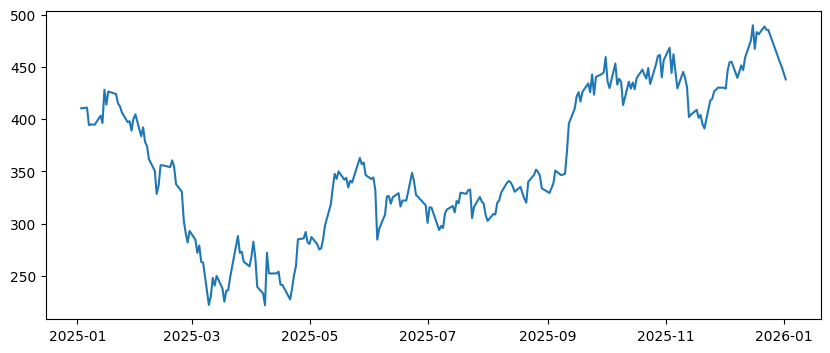

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = yf.Ticker("TSLA")
df = ticker.history(period="1y")

df.info()

plt.figure(figsize=(10,4))
plt.plot(df.index, df['Close'])
plt.show()

In [102]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-03 00:00:00-05:00,381.480011,411.880005,379.450012,410.440002,95423300,0.0,0.0
2025-01-06 00:00:00-05:00,423.200012,426.429993,401.700012,411.049988,85516500,0.0,0.0
2025-01-07 00:00:00-05:00,405.829987,414.329987,390.000000,394.359985,75699500,0.0,0.0
2025-01-08 00:00:00-05:00,392.950012,402.500000,387.399994,394.940002,73038800,0.0,0.0
2025-01-10 00:00:00-05:00,391.399994,399.279999,377.290009,394.739990,62287300,0.0,0.0
